In [ ]:
%load_ext autoreload
%autoreload 2

current path: /mnt/athena/hpsearch/nbs/examples
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of hpsearch.config.hpconfig failed: Traceback (most recent call last):
  File "/anaconda/envs/athena_gpu/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda/envs/athena_gpu/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/anaconda/envs/athena_gpu/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/anaconda/envs/athena_gpu/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/athena/hpsearch/hpsearch/config/hpconfig.py", line 14, in <module>
    experiment_manager = manager_factory.get_experiment_manager()
  File "

In [ ]:
#hide
#default_exp examples.complex_dummy_experiment_manager
from nbdev.showdoc import show_doc
import warnings
warnings.filterwarnings('ignore')
import os

max_count=10
while not os.path.exists('settings.ini'):
    os.chdir('..')
    max_count = max_count - 1
    if max_count <= 0:
        break

# Complex Dummy Experiment Manager

> Dummy experiment manager with features that allow additional functionality

In [ ]:
#export
from hpsearch.examples.dummy_experiment_manager import DummyExperimentManager, FakeModel
import hpsearch
import os
from hpsearch.visualization import plot_utils 

class ComplexDummyExperimentManager (DummyExperimentManager):

    def run_experiment (self, parameters={}, path_results='./results'):
        # extract hyper-parameters used by our model. All the parameters have default values if they are not passed.
        offset = parameters.get('offset', 0.5)   # default value: 0.5
        rate = parameters.get('rate', 0.01)   # default value: 0.01
        epochs = parameters.get('epochs', 10) # default value: 10
        noise = parameters.get('noise', 0.0)
        
        # other parameters that do not form part of our experiment definition
        # changing the values of these other parameters, does not make the ID of the experiment change
        verbose = parameters.get('verbose', True)
        
        # build model with given hyper-parameters
        model = FakeModel (offset=offset, rate=rate, epochs=epochs, noise = noise, verbose=verbose)
        
        # load training, validation and test data (fake step)
        model.load_data()
        
        # load previous model if exists
        if not model.load_model_and_history (path_results):
            # start from previous experiment if indicated by parameters
            path_results_previous_experiment = parameters.get('prev_path_results','')
            model.load_model_and_history (path_results_previous_experiment)
        
        # fit model with training data 
        model.fit ()
        
        # save model weights and evolution of accuracy metric across epochs
        model.save_model_and_history(path_results)
        
        # evaluate model with validation and test data
        validation_accuracy, test_accuracy = model.score()
        
        # store model
        self.model = model
        
        # the function returns a dictionary with keys corresponding to the names of each metric. 
        # We return result on validation and test set in this example
        dict_results = dict (validation_accuracy = validation_accuracy,
                             test_accuracy = test_accuracy)
        
        return dict_results
    


## Running experiments and removing experiments

In [ ]:
# export
import shutil
import os

def run_multiple_experiments (nruns=1, noise=0.0, verbose=True, rate=0.03):
    em = ComplexDummyExperimentManager ()
    parameters_single_value = dict(rate=rate, noise=noise)   # parameters where we use a fixed value
    parameters_multiple_values=dict(offset=[0.1, 0.3, 0.6], epochs=[5, 15, 30]) # parameters where we try multiple values
    other_parameters = dict(verbose=verbose) # parameters that control other aspects that are not part of our experiment definition (a new experiment is not created if we assign different values for these parametsers)
    em.grid_search (log_message='fixed rate, multiple epochs values',
            parameters_single_value=parameters_single_value,
            parameters_multiple_values=parameters_multiple_values,
            other_parameters=other_parameters,
            nruns=nruns)

def remove_previous_experiments():
    em = ComplexDummyExperimentManager ()
    path_results = em.get_path_experiments()
    if os.path.exists(path_results):
        shutil.rmtree(path_results)

In [ ]:
# collapse_output
remove_previous_experiments()

current path: /mnt/athena/hpsearch/nbs/examples


## Example use

### 1.- Creating new experiment that extends previous experiment by using a larger number of epochs

We see how to create a experiment that is the same as a previous experiment, only increasing the number of epochs. 

##### 1.a. For test purposes, we first run the full number of epochs, 30, take note of the accuracy, and remove the experiment

In [ ]:
# collapse_output
em = ComplexDummyExperimentManager ()
em.create_experiment_and_run (parameters = {'epochs': 30});
reference_accuracy = em.model.accuracy
reference_weight = em.model.weight

script: <ipython-input-20-758690e286c4>, line number: 3


current path: /mnt/athena/hpsearch/nbs/examples
write_manager failed with exception <class '__main__.ComplexDummyExperimentManager'> is a built-in class
model not found in /mnt/athena/hpsearch/hpsearch/../results/experiments/00000/0
model not found in 
fitting model with 30 epochs
epoch 0: accuracy: 0.51
epoch 1: accuracy: 0.52
epoch 2: accuracy: 0.53
epoch 3: accuracy: 0.54
epoch 4: accuracy: 0.55
epoch 5: accuracy: 0.56
epoch 6: accuracy: 0.5700000000000001
epoch 7: accuracy: 0.5800000000000001
epoch 8: accuracy: 0.5900000000000001
epoch 9: accuracy: 0.6000000000000001
epoch 10: accuracy: 0.6100000000000001
epoch 11: accuracy: 0.6200000000000001
epoch 12: accuracy: 0.6300000000000001
epoch 13: accuracy: 0.6400000000000001
epoch 14: accuracy: 0.6500000000000001
epoch 15: accuracy: 0.6600000000000001
epoch 16: accuracy: 0.6700000000000002
epoch 17: accuracy: 0.6800000000000002
epoch 18: accuracy: 0.6900000000000002
epoch 19: accuracy: 0.7000000000000002
epoch 20: accuracy: 0.6900000000

In [ ]:
from hpsearch.config.hpconfig import get_path_experiments
import os
import pandas as pd

path_experiments = get_path_experiments ()
print (f'experiments folders: {os.listdir(f"{path_experiments}/experiments")}\n')

experiments_data = pd.read_pickle (f'{path_experiments}/experiments_data.pk')
print ('csv data')
experiments_data

experiments folders: ['00000']

csv data


,epochs,0_validation_accuracy,0_test_accuracy,time_0,date,0_finished
0,30.0,0.6,0.5,0.003891,15:31:09.542899,True


##### we plot the history

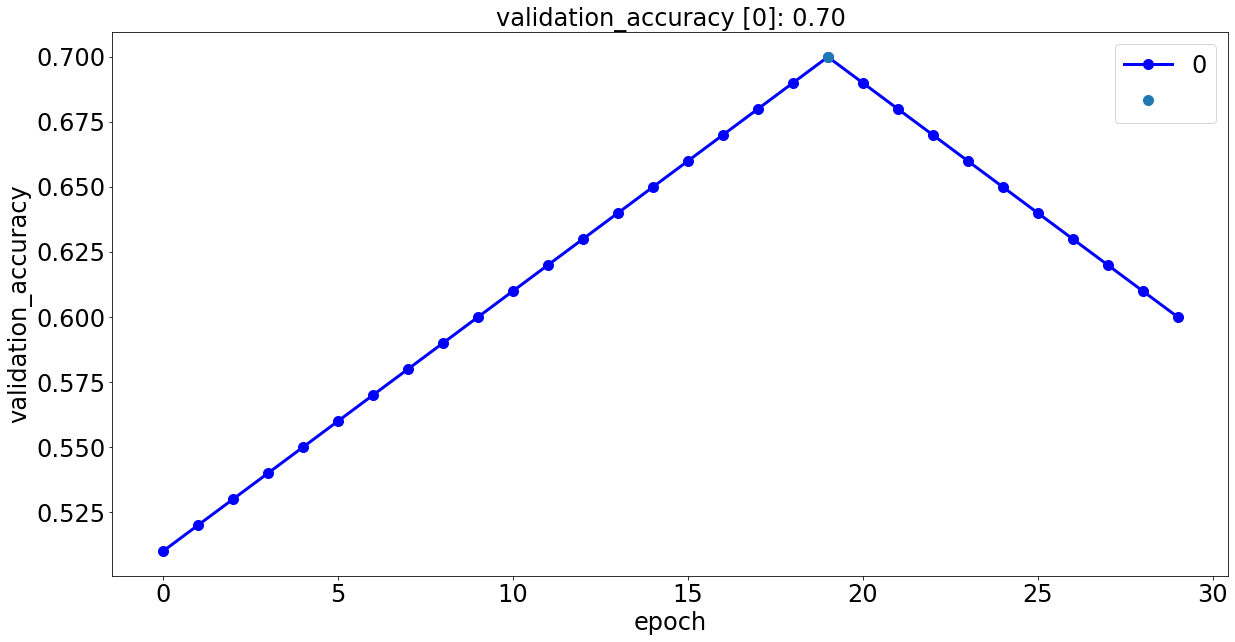

,validation_accuracy
0,0.7


In [ ]:
from hpsearch.visualization.experiment_visualization import plot_multiple_histories

plot_multiple_histories ([0], run_number=0, op='max', backend='matplotlib', metrics='validation_accuracy')

#### 1.b. Now we run two experiments: 

##### We run the first experiment  with 20 epochs:

In [ ]:
# a.- remove previous experiment
remove_previous_experiments()

# b.- create first experiment with epochs=20
em.create_experiment_and_run (parameters = {'epochs': 20});

script: <ipython-input-23-afeed775d1d0>, line number: 5


current path: /mnt/athena/hpsearch/nbs/examples
write_manager failed with exception <class '__main__.ComplexDummyExperimentManager'> is a built-in class
model not found in /mnt/athena/hpsearch/hpsearch/../results/experiments/00000/0
model not found in 
fitting model with 20 epochs
epoch 0: accuracy: 0.51
epoch 1: accuracy: 0.52
epoch 2: accuracy: 0.53
epoch 3: accuracy: 0.54
epoch 4: accuracy: 0.55
epoch 5: accuracy: 0.56
epoch 6: accuracy: 0.5700000000000001
epoch 7: accuracy: 0.5800000000000001
epoch 8: accuracy: 0.5900000000000001
epoch 9: accuracy: 0.6000000000000001
epoch 10: accuracy: 0.6100000000000001
epoch 11: accuracy: 0.6200000000000001
epoch 12: accuracy: 0.6300000000000001
epoch 13: accuracy: 0.6400000000000001
epoch 14: accuracy: 0.6500000000000001
epoch 15: accuracy: 0.6600000000000001
epoch 16: accuracy: 0.6700000000000002
epoch 17: accuracy: 0.6800000000000002
epoch 18: accuracy: 0.6900000000000002
epoch 19: accuracy: 0.7000000000000002


In [ ]:
from IPython.display import display
print (f'experiments folders: {os.listdir(f"{path_experiments}/experiments")}\n')

experiments_data = pd.read_pickle (f'{path_experiments}/experiments_data.pk')
print ('csv data')
display(experiments_data)
print (f'weight: {em.model.weight}, accuracy: {em.model.accuracy}')

experiments folders: ['00000']

csv data


,epochs,0_validation_accuracy,0_test_accuracy,time_0,date,0_finished
0,20.0,0.7,0.6,0.002729,15:31:09.937517,True


weight: 0.20000000000000004, accuracy: 0.7000000000000002


###### We run the second experiment  resumes from the previous one and increases the epochs to 30

In [ ]:
# 4.- create second experiment with epochs=10
em.create_experiment_and_run (parameters = {'epochs': 30}, 
                          other_parameters={'prev_epoch': True,
                                           'name_epoch': 'epochs',
                                           'previous_model_file_name': 'model_weights.pk'});


script: <ipython-input-25-77538f07abda>, line number: 5


write_manager failed with exception <class '__main__.ComplexDummyExperimentManager'> is a built-in class
model not found in /mnt/athena/hpsearch/hpsearch/../results/experiments/00001/0
fitting model with 10 epochs
epoch 0: accuracy: 0.6900000000000002
epoch 1: accuracy: 0.6800000000000002
epoch 2: accuracy: 0.6700000000000002
epoch 3: accuracy: 0.6600000000000001
epoch 4: accuracy: 0.6500000000000001
epoch 5: accuracy: 0.6400000000000001
epoch 6: accuracy: 0.6300000000000001
epoch 7: accuracy: 0.6200000000000001
epoch 8: accuracy: 0.6100000000000001
epoch 9: accuracy: 0.6000000000000001


In [ ]:
experiments_data = pd.read_pickle (f'{path_experiments}/experiments_data.pk')
print ('csv data')
display(experiments_data)

new_accuracy = em.model.accuracy
new_weight = em.model.weight

assert new_weight==reference_weight
assert new_accuracy==reference_accuracy

print (f'weight: {new_weight}, accuracy: {new_accuracy}')

csv data


,epochs,0_validation_accuracy,0_test_accuracy,time_0,date,0_finished
0,20.0,0.7,0.6,0.002729,15:31:09.937517,True
1,30.0,0.6,0.5,0.001728,15:31:10.052230,True


weight: 0.3000000000000001, accuracy: 0.6000000000000001


##### we plot the history

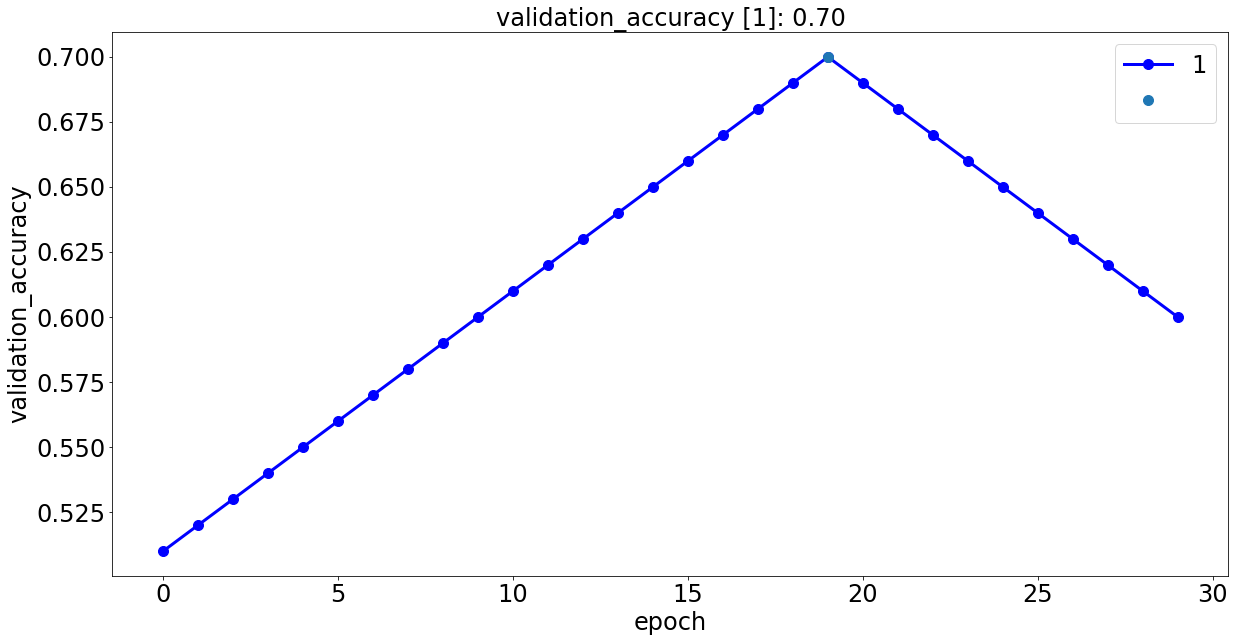

,validation_accuracy
1,0.7


In [ ]:
plot_multiple_histories ([1], run_number=0, op='max', backend='matplotlib', metrics='validation_accuracy')

In [ ]:
#hide
from nbdev.export import *
notebook2script(recursive=True)

Converted hpconfig.ipynb.
Converted manager_factory.ipynb.
Converted complex_dummy_experiment_manager.ipynb.
Converted dummy_experiment_manager.ipynb.
Converted example_experiment.ipynb.
Converted example_experiment_manager.ipynb.
Converted experiment_manager.ipynb.
Converted index.ipynb.
Converted change_manager.ipynb.
Converted metric_visualization.ipynb.
Converted print_parameters.ipynb.
Converted query.ipynb.
Converted experiment_utils.ipynb.
Converted organize_experiments.ipynb.
Converted resume_from_checkpoint.ipynb.
Converted experiment_visualization.ipynb.
Converted plot_utils.ipynb.
